# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
upload_file = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [0]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [0]:
num_col = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_col))
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
col_numerical = [e for e in num_col if e not in remove_list]
attrition_to_num = {'Yes': 0,
                    'No': 1}
df['Attrition_num'] = df['Attrition'].map(attrition_to_num)
col_categorical.remove('Attrition')
df_cat = pd.get_dummies(df[col_categorical])
X = pd.concat([df[col_numerical], df_cat], axis=1)
y = df['Attrition_num']

# Decision Tree

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = DecisionTreeClassifier(random_state=42)

In [0]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

In [0]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[180   0]
 [  0 922]]

Average Accuracy: 	 0.7913
Accuracy SD: 		 0.0294


In [0]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7935

Classification Report: 
               precision    recall  f1-score   support

           0       0.35      0.39      0.37        57
           1       0.89      0.87      0.88       311

    accuracy                           0.79       368
   macro avg       0.62      0.63      0.62       368
weighted avg       0.80      0.79      0.80       368


Confusion Matrix: 
 [[ 22  35]
 [ 41 270]]



The result is clearly not satisfactory. We will revisit this project after we covered ensemble model.

****

# Bagging

In [0]:
from sklearn.ensemble import BaggingClassifier

In [0]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=100,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [0]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=42,
                                                        splitter='best'),
      

In [0]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[180   0]
 [  0 922]]

Average Accuracy: 	 0.8611
Accuracy SD: 		 0.0217
Test Result:

accuracy score: 0.8261

Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.19      0.26        57
           1       0.86      0.94      0.90       311

    accuracy                           0.83       368
   macro avg       0.62      0.57      0.58       368
weighted avg       0.79      0.83      0.80       368


Confusion Matrix: 
 [[ 11  46]
 [ 18 293]]



***

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [0]:
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[180   0]
 [  0 922]]

Average Accuracy: 	 0.8602
Accuracy SD: 		 0.0124
Test Result:

accuracy score: 0.8424

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.12      0.19        57
           1       0.86      0.97      0.91       311

    accuracy                           0.84       368
   macro avg       0.66      0.55      0.55       368
weighted avg       0.80      0.84      0.80       368


Confusion Matrix: 
 [[  7  50]
 [  8 303]]



In [0]:
import seaborn as sns

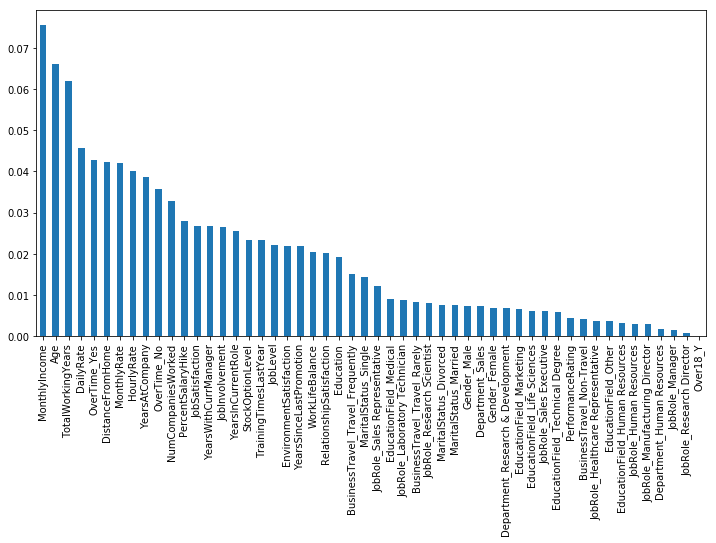

In [0]:
pd.Series(rf_clf.feature_importances_, 
         index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# AdaBoost

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
ada_clf = AdaBoostClassifier()

In [0]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [0]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.54      0.65       180
           1       0.92      0.98      0.94       922

    accuracy                           0.90      1102
   macro avg       0.86      0.76      0.80      1102
weighted avg       0.90      0.90      0.90      1102


Confusion Matrix: 
 [[ 97  83]
 [ 23 899]]

Average Accuracy: 	 0.8648
Accuracy SD: 		 0.0225
Test Result:

accuracy score: 0.8696

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.37      0.47        57
           1       0.89      0.96      0.93       311

    accuracy                           0.87       368
   macro avg       0.76      0.66      0.70       368
weighted avg       0.85      0.87      0.85       368


Confusion Matrix: 
 [[ 21  36]
 [ 12 299]]



***

# AdaBoost + RandomForest

In [0]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                        

In [0]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       180
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[180   0]
 [  0 922]]

Average Accuracy: 	 0.8648
Accuracy SD: 		 0.0147
Test Result:

accuracy score: 0.8451

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.18      0.26        57
           1       0.86      0.97      0.91       311

    accuracy                           0.85       368
   macro avg       0.68      0.57      0.59       368
weighted avg       0.81      0.85      0.81       368


Confusion Matrix: 
 [[ 10  47]
 [ 10 301]]



***

# Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gbc_clf = GradientBoostingClassifier(n_estimators=100)
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9628

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.78      0.87       180
           1       0.96      1.00      0.98       922

    accuracy                           0.96      1102
   macro avg       0.98      0.89      0.93      1102
weighted avg       0.96      0.96      0.96      1102


Confusion Matrix: 
 [[140  40]
 [  1 921]]

Average Accuracy: 	 0.8747
Accuracy SD: 		 0.0182
Test Result:

accuracy score: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.26      0.38        57
           1       0.88      0.97      0.92       311

    accuracy                           0.86       368
   macro avg       0.77      0.62      0.65       368
weighted avg       0.84      0.86      0.84       368


Confusion Matrix: 
 [[ 15  42]
 [  8 303]]



***

# XGBoost

In [0]:
import xgboost as xgb

In [0]:
xgb_clf = xgb.XGBClassifier(n_estimators=100)
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

accuracy score: 0.9501

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.71      0.82       180
           1       0.95      1.00      0.97       922

    accuracy                           0.95      1102
   macro avg       0.97      0.85      0.90      1102
weighted avg       0.95      0.95      0.95      1102


Confusion Matrix: 
 [[127  53]
 [  2 920]]

Average Accuracy: 	 0.8711
Accuracy SD: 		 0.0207
Test Result:

accuracy score: 0.8587

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.25      0.35        57
           1       0.88      0.97      0.92       311

    accuracy                           0.86       368
   macro avg       0.74      0.61      0.64       368
weighted avg       0.83      0.86      0.83       368


Confusion Matrix: 
 [[ 14  43]
 [  9 302]]



***